In [7]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [8]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [9]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [10]:
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

In [12]:
#Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [13]:
# Normalize
X_std = StandardScaler().fit_transform(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.

In [ ]:
#eps=2 and min_samples=6

In [32]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2, min_samples=6)

# Fit model
cluster_1 = dbscan_cluster.fit_predict(X_std)

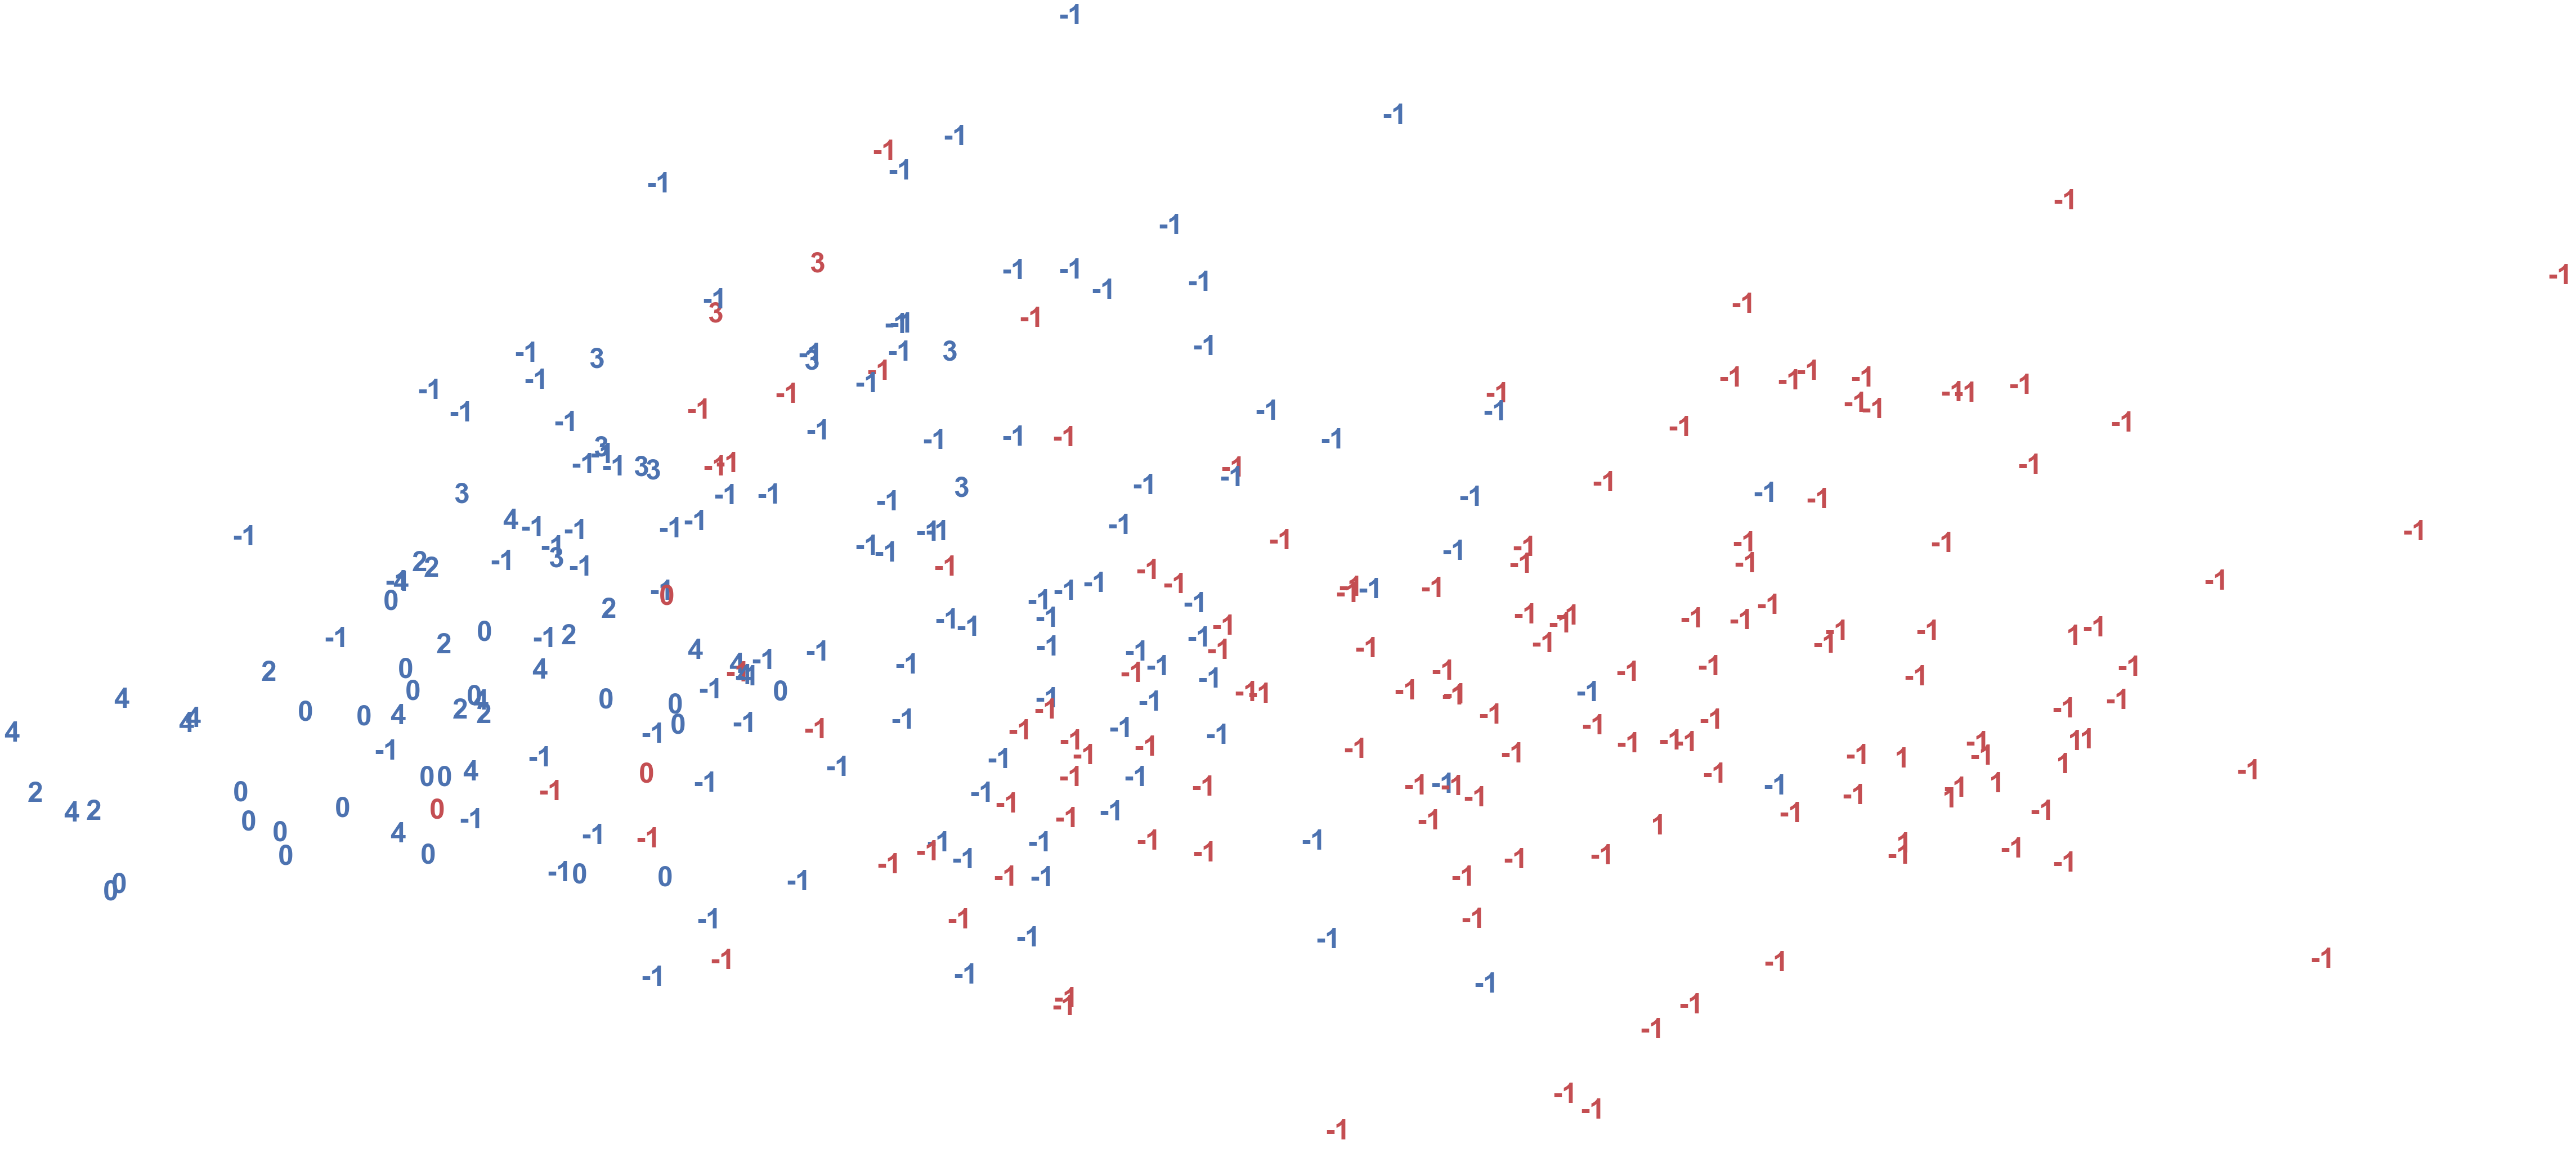

In [34]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(cluster_1[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
#eps=3 and min_samples=5

In [35]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=3, min_samples=5)

# Fit model
clusters_2 = dbscan_cluster.fit_predict(X_std)

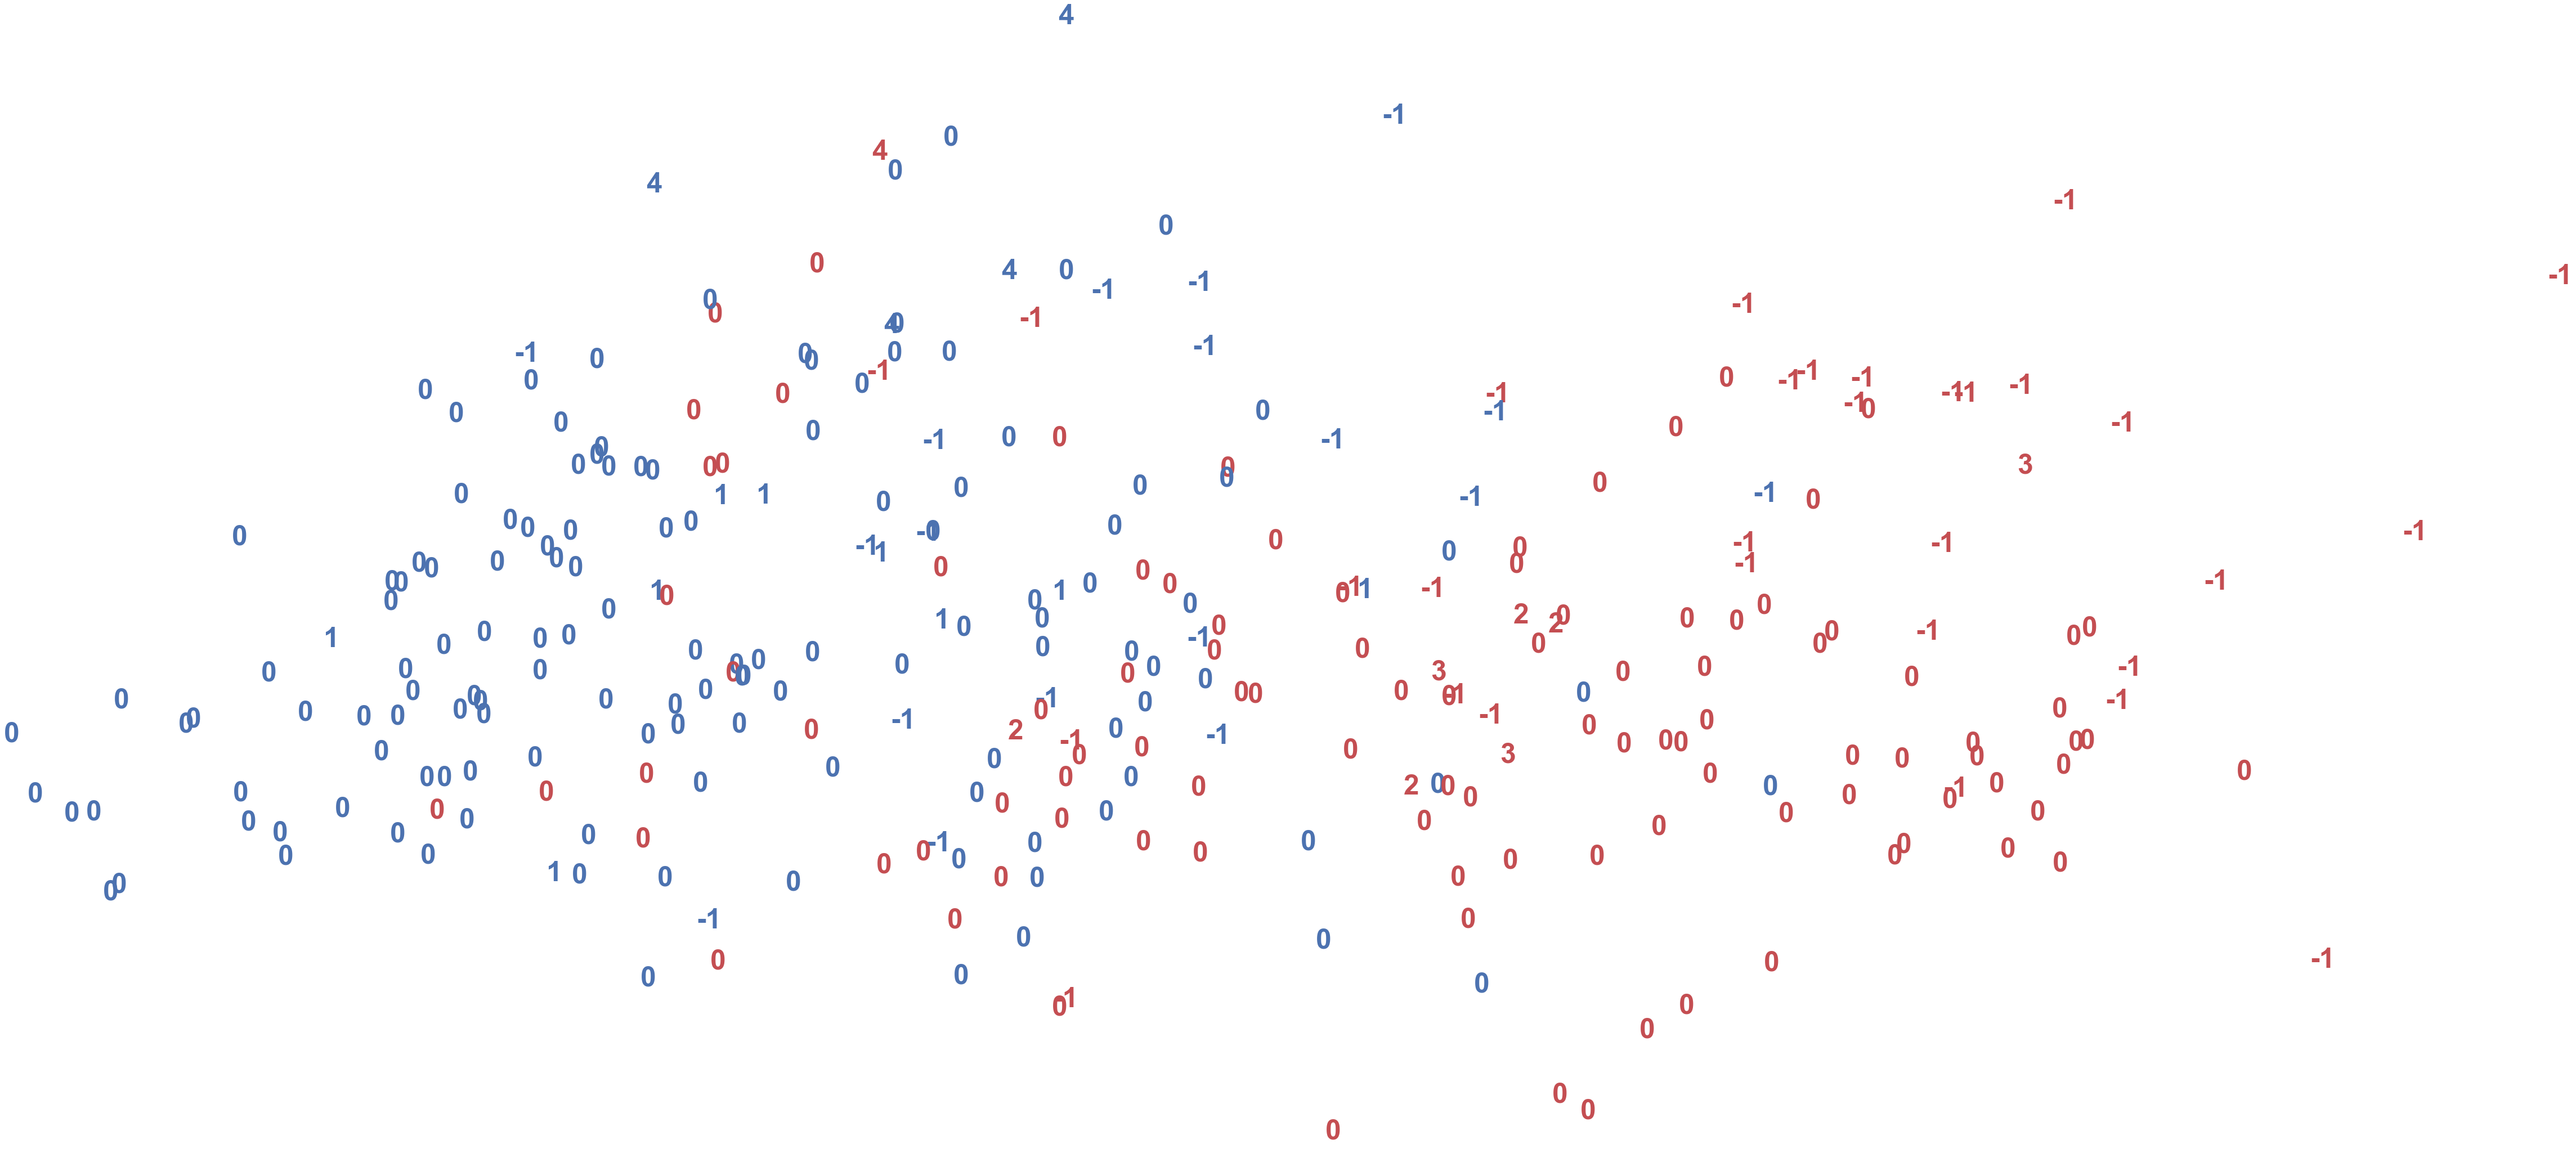

In [36]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_2[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
#eps=1 and min_samples=8

In [37]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=8)

# Fit model
clusters_3 = dbscan_cluster.fit_predict(X_std)

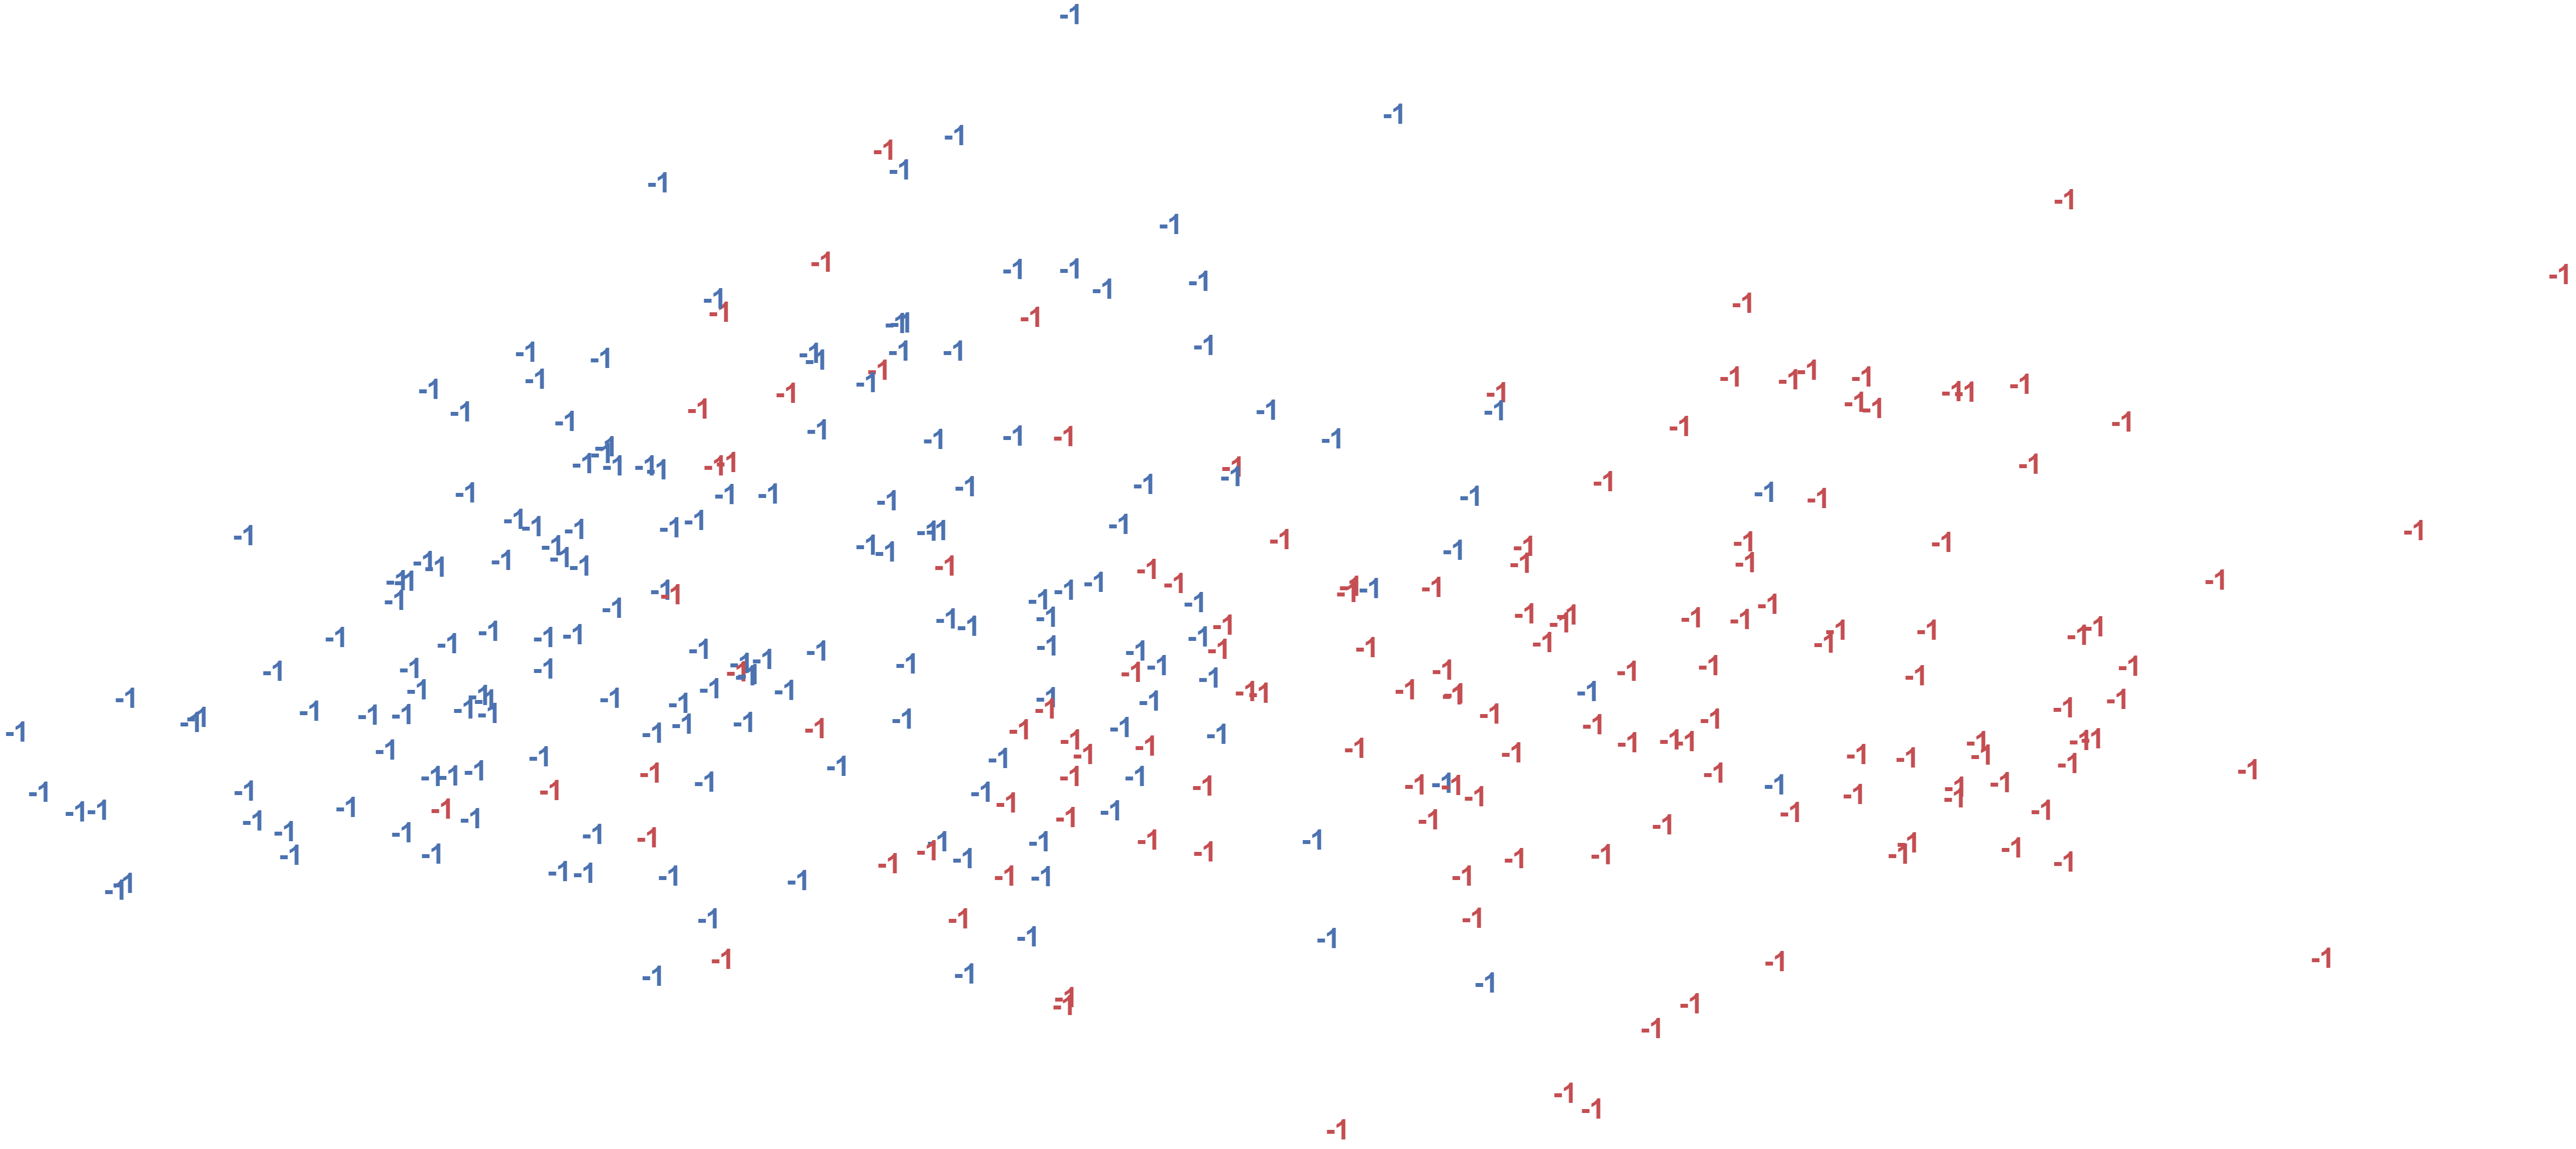

In [38]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_3[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?

In [39]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=1)

# Fit model
clusters_4 = dbscan_cluster.fit_predict(X_std)

In [40]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_4, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.02806263640143188


In [42]:
#increasing min_samples
dbscan_cluster = DBSCAN(eps=1, min_samples=2)
# Fit model
clusters_5 = dbscan_cluster.fit_predict(X_std)
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_5, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.2558056626717109


In [44]:
#increasing min_samples
dbscan_cluster = DBSCAN(eps=1, min_samples=3)
# Fit model
clusters_6 = dbscan_cluster.fit_predict(X_std)
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_6, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.11413521440464984


By increasing the min_samples, the silhouette score becomes negative 

# Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

In [46]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1)
# Fit model
clusters_7 = dbscan_cluster.fit_predict(X_std)
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_7, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.02806263640143188


In [47]:
#increase eps
dbscan_cluster = DBSCAN(eps=2, min_samples=1)
# Fit model
clusters_8 = dbscan_cluster.fit_predict(X_std)
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_8, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.06330651921428511


In [49]:
#increase eps
dbscan_cluster = DBSCAN(eps=3, min_samples=1)
# Fit model
clusters_9 = dbscan_cluster.fit_predict(X_std)
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_9, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.08601154193041533


In [50]:
#increase eps
dbscan_cluster = DBSCAN(eps=4, min_samples=1)
# Fit model
clusters_10 = dbscan_cluster.fit_predict(X_std)
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_10, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.2801872428424653


In [53]:
#increase eps
dbscan_cluster = DBSCAN(eps=5, min_samples=1)
# Fit model
clusters_11 = dbscan_cluster.fit_predict(X_std)
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_11, metric='euclidean')))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

The effect of increasing the eps value is that the silhouette increases until 5